# Diabetes Predictor

According to World Health Organization, roughly 422 million people worldwide suffer from diabetes, with the majority of them living in low and middle-income countries. Additionally, 1.6 million deaths are directly attributed to diabetes every year.

Inspired by this astonishing fact, we have decided to come up with a diabetes predictor to have an early detection on diabetes, in hopes of allowing the patient to receive treatment as quickly as possible.

For this project, we have obtained our datasets from the following URL: https://www.kaggle.com/c/diabetes-classification/data

## Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

#Loading Data 
diabetes_data = pd.read_csv("train.csv")
diabetes_data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [2]:
n_rows, n_cols = diabetes_data.shape 
print(f"# No. of rows: {n_rows}")
print(f"# No. of columns: {n_cols}")

# No. of rows: 614
# No. of columns: 10


There are 614 rows and 10 columns in the training dataset provided.

## Data Dictionary
<br>

|Column name|<p align="left"> Explanation|<p align="left"> Data type| Details|
|:---:|:---:|:---:|:---:|
|p_id|<p align="left"> Identification Number | categorical | 
|no_times_pregnant| <p align="left"> No. of times pregnant | numerical | 
|glucose_concentration| <p align="left"> Glucose concentration | numerical |
|blood_pressure| <p align="left"> Diastollic blood pressure (mm Hg) | numerical |
|skin_fold_thickness| <p align="left"> Triceps skin fold thickness (mm) | numerical| 
|serum_insulin| <p align="left"> serum insulin (mu U/ml) | numerical |
|bmi| <p align="left"> Body Mass Index (weight in kg/(height in m)^2)| numerical |
|diabetes pedigree| <p align="left"> Diabetes pedigree function - Represents how likely the patients are to get the disease by extrapolating from their ancestor’s history |numerical|
|age| <p align="left"> Age of participants (years) | numerical |
|diabetes| <p align="left"> Whether the patient suffers from diabetes | categorical | 0: tested negative 1: tested positive |


### Data Preprocessing 

We decided to do a preliminary analysis of the datatype of the variables and to check whether there were any null values present in the dataset.

In [3]:
# Finding any null values and datatype of variables in dataset
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


As shown above, there was no missing data in the dataset provided. 

Also, since all the categorical data (`p_id`, `diabetes`) in the dataset are displayed numerically, no encoding was needed.

### Statistical Summary

In [4]:
# statistics from dataset
diabetes_data.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


From this, we realised that the variables `glucose_concentration`, `blood_pressure`, `skin_fold_thickness`, `serum_insulin` and `bmi` have values of **0**. However, in reality, these variables **cannot be 0**, rendering them to be **invalid data**. 

Hence, we decided to replace these values with **NaN**.

In [5]:
invalid_columns = ['glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin','bmi']
diabetes_data[invalid_columns] = diabetes_data[invalid_columns].replace(0,np.nan)

In [6]:
# to count the percentage of elements which is not NaN for each column.
diabetes_data.count() / n_rows

p_id                     1.000000
no_times_pregnant        1.000000
glucose_concentration    0.993485
blood_pressure           0.949511
skin_fold_thickness      0.695440
serum_insulin            0.504886
bmi                      0.983713
diabetes pedigree        1.000000
age                      1.000000
diabetes                 1.000000
dtype: float64

As shown above, since `serum_insulin` and `skin_fold_thickness` have **> 30% of NaN values**, we decided to **drop these 2 columns**.
 


In [7]:
#dropping serum_insulin and skin_fold_thickness columns 
diabetes_data.drop(columns=['serum_insulin', 'skin_fold_thickness'], inplace=True)

print(f"The shape of the resulting dataframe is now {diabetes_data.shape}")

The shape of the resulting dataframe is now (614, 8)


In [8]:
diabetes_data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,bmi,diabetes pedigree,age,diabetes
0,316,2,112.0,68.0,34.1,0.315,26,0
1,25,11,143.0,94.0,36.6,0.254,51,1
2,710,2,93.0,64.0,38.0,0.674,23,1
3,658,1,120.0,80.0,38.9,1.162,41,0
4,542,3,128.0,72.0,32.4,0.549,27,1


Since there are little NaN values (< 10%) for `glucose_concentration`, `blood_pressure` and `bmi`, we decided to **impute** the NaN values for these variables with the **mean** using `sklearn SimpleImputer`.

In [9]:
#Importing the impute class
from sklearn.impute import SimpleImputer

#Imputer object using the mean_strategy and missing values type for imputation
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = imputer.fit(diabetes_data)

#imputing the values 
diabetes_data = pd.DataFrame(imputer.transform(diabetes_data), columns = ['p_id','no_times_pregnant','glucose_concentration', 'blood_pressure', 'bmi', 'diabetes pedigree', 'age', 'diabetes']) 

In [10]:
# This code finds out the percentage of outliers for every variable in the dataset, following the IQR definition of outliers

for k, v in diabetes_data.items(): 
    # we will not be finding the outliers for Diabetes and P_ID since they are categorical
    if (k != 'diabetes' and k != 'p_id'): 
        q1 = v.quantile(0.25) # this identifies the 25th percentile
        q3 = v.quantile(0.75) # this identifies the 75th percentile
        irq = q3 - q1 #this is the interquartile range 
        
        v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)] # these rows are outliers 
        perc = np.shape(v_col)[0] * 100.0 / np.shape(diabetes_data)[0]  # finding percentage of outliers
        print("Column %s:  outliers = %.2f%%" % (k, perc))

Column no_times_pregnant:  outliers = 0.49%
Column glucose_concentration:  outliers = 0.00%
Column blood_pressure:  outliers = 1.47%
Column bmi:  outliers = 0.98%
Column diabetes pedigree:  outliers = 4.23%
Column age:  outliers = 1.47%


As shown from the percentages of outliers above, variables with outlier percentages **above 3%** include `diabetes pedigree `. 

Due to the **limited size of our dataset**, we decided to be careful in dropping rows while dealing with the outliers. For every independent variable, we will **create a boxplot** to get a rough sensing of the number of outliers. 

If there is no outlier identified by the boxplot, there will be no need to deal with outliers. 

**Should there be any outliers**, we will **use a scatter plot** to further investigate its relationship with the dependent variable which we are interested in, `diabetes`, before deciding the appropriate way of dealing with them contextually. 

### Variables without outliers 

#### 1. Glucose_concentration univariate analysis

As shown in the analysis of percentage of outliers for each variable above, it shows that the variables `glucose_concentration` **do not have any outliers**. Hence, for this variable, we do not need to deal with any outliers. 

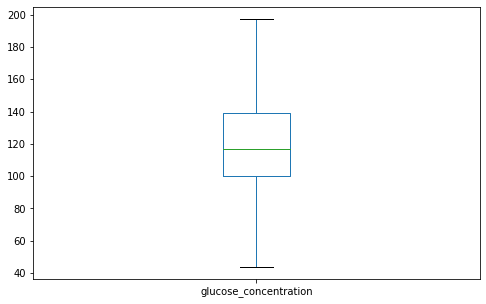

In [11]:
no_outliers = diabetes_data[["glucose_concentration"]]
no_outliers.plot(kind='box',  subplots = True, figsize=(8, 5))
plt.show()

### Variables with outliers

#### 2. Dealing with no_of_times_pregnant outliers 

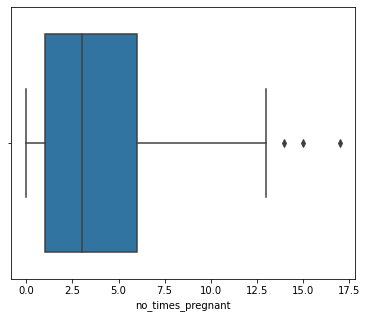

In [12]:
fig = plt.figure(figsize=(21, 5))

plt.subplot(1,3,2)
ax1 = sb.boxplot(x = diabetes_data["no_times_pregnant"])

From the boxplot, since there are **only a few outliers (3 in total)**, mostly from those who are pregnant more than 12.5 times, we decided that it would be reasonable to remove these outliers.

In [13]:
q1_Times_Pregnant = diabetes_data["no_times_pregnant"].describe()["25%"] # the 25th percentile
q3_Times_Pregnant = diabetes_data["no_times_pregnant"].describe()["75%"] # the 75th percentile

upper_threshold_pregnant = q3_Times_Pregnant + 1.5 * (q3_Times_Pregnant-q1_Times_Pregnant) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold_pregnant = 0 # determines lower threshold. Plots below this value would be considered outliers
# The lower threshold will be 0 as it is the minimum number of times a person can be pregnant.

print("Upper threshold: "f"{upper_threshold_pregnant}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold_pregnant}"); # value of lower threshold 
Times_Pregnant_Outliers = diabetes_data[(diabetes_data["no_times_pregnant"] < lower_threshold_pregnant)|(diabetes_data["no_times_pregnant"] > upper_threshold_pregnant)] 
num_rows = len(Times_Pregnant_Outliers.index) # number of outliers that was removed
print(f'Number of outliers deleted: {num_rows}')

diabetes_data = diabetes_data[(diabetes_data["no_times_pregnant"] <= upper_threshold_pregnant) & (diabetes_data["no_times_pregnant"] >= lower_threshold_pregnant)]

#finding the shape of dataframe after dropping outliers
n_rows, n_cols = diabetes_data.shape
print(f"number of rows after dropping: {n_rows}")

Upper threshold: 13.5
Lower threshold: 0
Number of outliers deleted: 3
number of rows after dropping: 611


#### 3. Dealing with blood_pressure outliers 

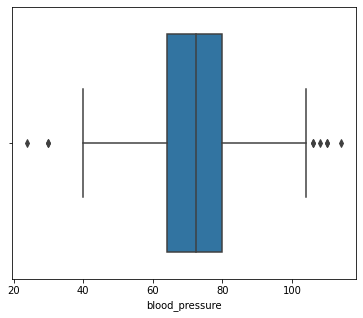

In [14]:
fig = plt.figure(figsize=(21, 5))

plt.subplot(1,3,2)
ax1 = sb.boxplot(x = diabetes_data["blood_pressure"])

As seen from the boxplot above, there are **only a few outliers (6 in total)**, we decided that it would be reasonable to remove these outliers to prevent them from affecting our analysis.

In [15]:
q1_Times_Blood_Pressure = diabetes_data["blood_pressure"].describe()["25%"] # the 25th percentile
q3_Times_Blood_Pressure = diabetes_data["blood_pressure"].describe()["75%"] # the 75th percentile

upper_threshold_blood_pressure = q3_Times_Blood_Pressure + 1.5 * (q3_Times_Blood_Pressure-q1_Times_Blood_Pressure) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold_blood_pressure = q1_Times_Blood_Pressure - 1.5 * (q3_Times_Blood_Pressure-q1_Times_Blood_Pressure) # determines lower threshold. Plots below this value would be considered outliers

print("Upper threshold: "f"{upper_threshold_blood_pressure}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold_blood_pressure}"); # value of lower threshold 
Blood_Pressure_Outliers = diabetes_data[(diabetes_data["blood_pressure"] < lower_threshold_blood_pressure)|(diabetes_data["blood_pressure"] > upper_threshold_blood_pressure)] 
num_rows = len(Blood_Pressure_Outliers.index) # number of outliers that was removed
print(f'Number of outliers deleted: {num_rows}')

diabetes_data = diabetes_data[(diabetes_data["blood_pressure"] <= upper_threshold_blood_pressure) & (diabetes_data["blood_pressure"] >= lower_threshold_blood_pressure)]

#finding the shape of dataframe after dropping outliers
n_rows, n_cols = diabetes_data.shape
print(f"number of rows after dropping: {n_rows}")

Upper threshold: 104.0
Lower threshold: 40.0
Number of outliers deleted: 9
number of rows after dropping: 602


#### 4. Dealing with bmi outliers 

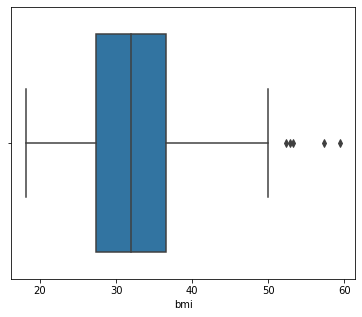

In [16]:
fig = plt.figure(figsize=(21, 5))

plt.subplot(1,3,2)
ax1 = sb.boxplot(x = diabetes_data["bmi"])

As seen from the boxplot and calculation above, there is a **small percentage of outliers (5 in total)**, we also decided to remove them. 

In [17]:
q1_Times_bmi = diabetes_data["bmi"].describe()["25%"] # the 25th percentile
q3_Times_bmi = diabetes_data["bmi"].describe()["75%"] # the 75th percentile

upper_threshold_bmi = q3_Times_bmi + 1.5 * (q3_Times_bmi-q1_Times_bmi) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold_bmi = (q1_Times_bmi - 1.5 * (q3_Times_bmi-q1_Times_bmi)) if ((q1_Times_bmi - 1.5 * (q3_Times_bmi-q1_Times_bmi)) > diabetes_data["bmi"].describe()["min"]) else diabetes_data["bmi"].describe()["min"] # determines lower threshold. Plots below this value would be considered outliers # determines lower threshold. Plots below this value would be considered outliers

print("Upper threshold: "f"{upper_threshold_bmi}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold_bmi}"); # value of lower threshold 
Times_bmi_Outliers = diabetes_data[(diabetes_data["bmi"] < lower_threshold_bmi)|(diabetes_data["bmi"] > upper_threshold_bmi)] 
num_rows = len(Times_bmi_Outliers.index) # number of outliers that was removed
print(f'Number of outliers deleted: {num_rows}')

diabetes_data = diabetes_data[(diabetes_data["bmi"] <= upper_threshold_bmi) & (diabetes_data["bmi"] >= lower_threshold_bmi)]

#finding the shape of dataframe after dropping outliers
n_rows, n_cols = diabetes_data.shape
print(f"number of rows after dropping: {n_rows}")

Upper threshold: 50.150000000000006
Lower threshold: 18.2
Number of outliers deleted: 5
number of rows after dropping: 597


#### 5. Dealing with diabetes_pedigree outliers 

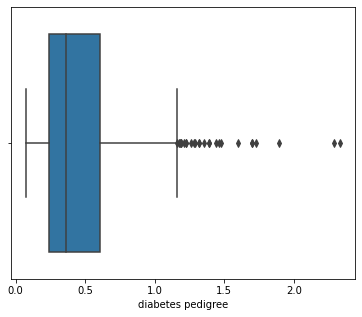

In [18]:
fig = plt.figure(figsize=(21, 5))

plt.subplot(1,3,2)
ax1 = sb.boxplot(x = diabetes_data["diabetes pedigree"])

Based on the box plot, the outliers all lie after a `diabetes pedigree` value of 1.0. However, since diabetes pedigree could be an **important factor in determining if a person will have diabetes**, we decided not to remove the outliers in this case.

#### 6. Dealing with age outliers 

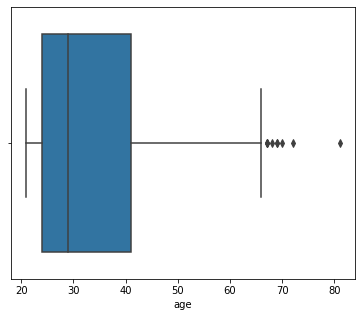

In [19]:
fig = plt.figure(figsize=(21, 5))

plt.subplot(1,3,2)
ax1 = sb.boxplot(x = diabetes_data["age"])

As seen from the boxplot and calculation above, there is a **small percentage of outliers (6 in total)**, we also decided to remove them. 

In [20]:
q1_Times_age = diabetes_data["age"].describe()["25%"] # the 25th percentile
q3_Times_age = diabetes_data["age"].describe()["75%"] # the 75th percentile

upper_threshold_age = q3_Times_age + 1.5 * (q3_Times_age-q1_Times_age) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold_age = (q1_Times_age - 1.5 * (q3_Times_age-q1_Times_age)) if ((q1_Times_age - 1.5 * (q3_Times_age-q1_Times_age)) > diabetes_data["age"].describe()["min"]) else diabetes_data["age"].describe()["min"] # determines lower threshold. Plots below this value would be considered outliers

print("Upper threshold: "f"{upper_threshold_age}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold_age}"); # value of lower threshold 
age_Outliers = diabetes_data[(diabetes_data["age"] < lower_threshold_age)|(diabetes_data["age"] > upper_threshold_age)] 
num_rows = len(age_Outliers.index) # number of outliers that was removed
print(f'Number of outliers deleted: {num_rows}')

diabetes_data = diabetes_data[(diabetes_data["age"] <= upper_threshold_age) & (diabetes_data["age"] >= lower_threshold_age)]

#finding the shape of dataframe after dropping outliers
n_rows, n_cols = diabetes_data.shape
print(f"number of rows after dropping: {n_rows}")

Upper threshold: 66.5
Lower threshold: 21.0
Number of outliers deleted: 9
number of rows after dropping: 588


### Data Visualization

Since our dependent variable `diabetes` is a **categorical** variable, we decided to plot a **bar plot** to visualize its distribution. 

0.0    387
1.0    201
Name: diabetes, dtype: int64


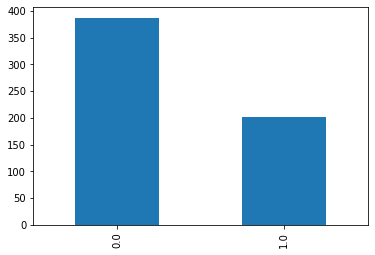

In [21]:
#Data visualization for number of people with diabetes and no diabetes
print(diabetes_data.diabetes.value_counts())
p = diabetes_data.diabetes.value_counts().plot(kind='bar')

Since all independent variables are **numerical** based on the dataset, we can start off by plot **histograms** for all features. The objective is to **select features or engineer new features** so that they can be used as our attributes for our model later.

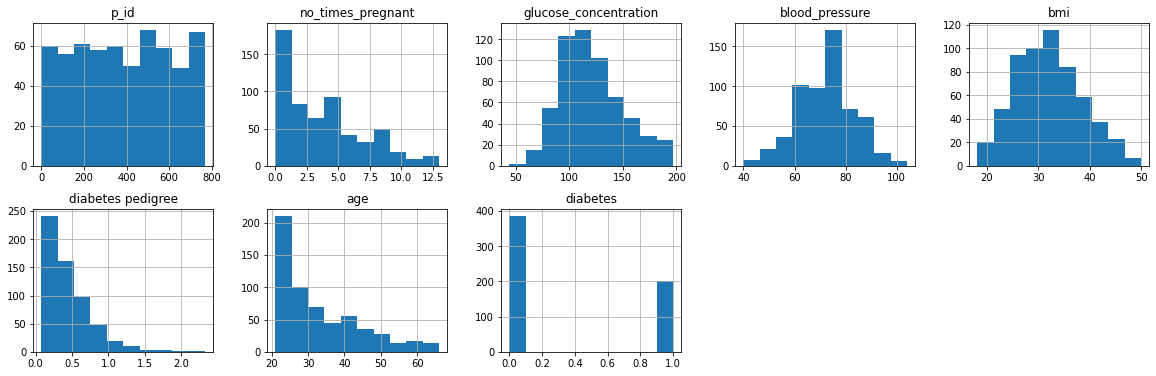

In [22]:
diabetes_data.hist(layout=(9,5), figsize=(20,30))

plt.show()

Based on a visual observation, we noted the following:

1. The variable `p_id` is an index, hence it would **not have explanatory power**

2. The variables were **not dominated by a limited range of values**

As such, we felt that there is no need to create new features to be used as attributes. We will **select all independent variables except for `p_id`** as a preliminary set of variables for further Exploratory Data Analysis. Hence, we will plot boxplots of these independent variables with respect  to the `diabetes` variable to investigate their correlation. 

If the median values along with the IQR increase or decrease as we move from one category to another category, then we consider that the feature is corrleated to `diabetes`.  


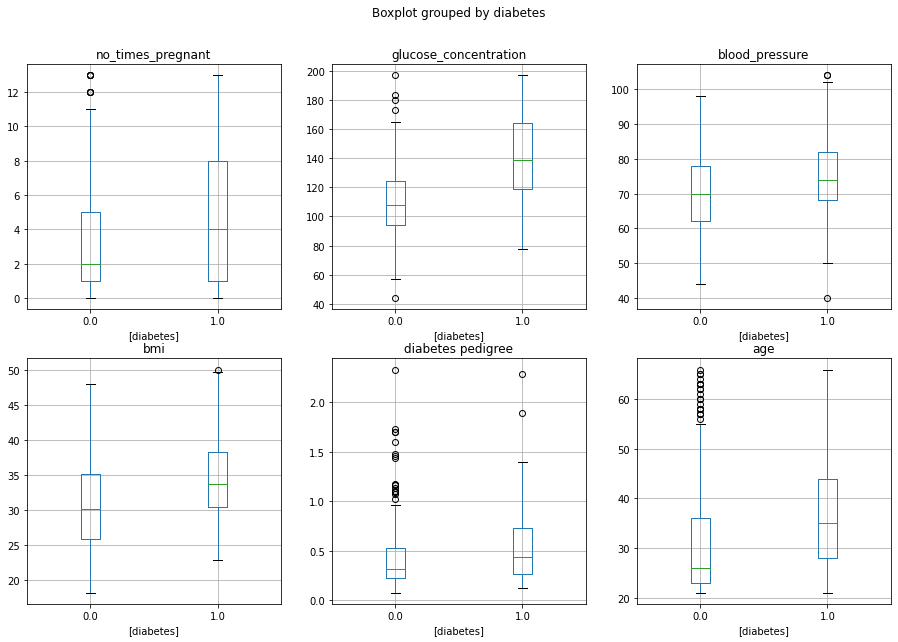

In [23]:
features_selected = ["no_times_pregnant", "glucose_concentration", "blood_pressure","bmi","diabetes pedigree","age"]

n = len(features_selected)

r, c = 2,3
fig, ax = plt.subplots(r, c, figsize=(15,10))

for i in range(n):
    feature = features_selected[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    diabetes_data[['diabetes',feature]].boxplot(by='diabetes', ax=ax)

plt.show()

Based on the criteria, all of the independent variables seems to be **correlated with** `diabetes`. However, we want to ensure that our independent variables are not correlated against each other as features with high correlation are considered to be **redundant**. 

Thus, we have decided to plot a **heatmap** to **visualize their correlation with each other**.

We used the $r^2$ value since it is a statistical measure that **represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model**. While the correlation r value simply explains the strength of the relationship between 2 variables, $r^2$ explains to what **extent the variance of one variable explains the variance of the second variable**. In other words, if the $r^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

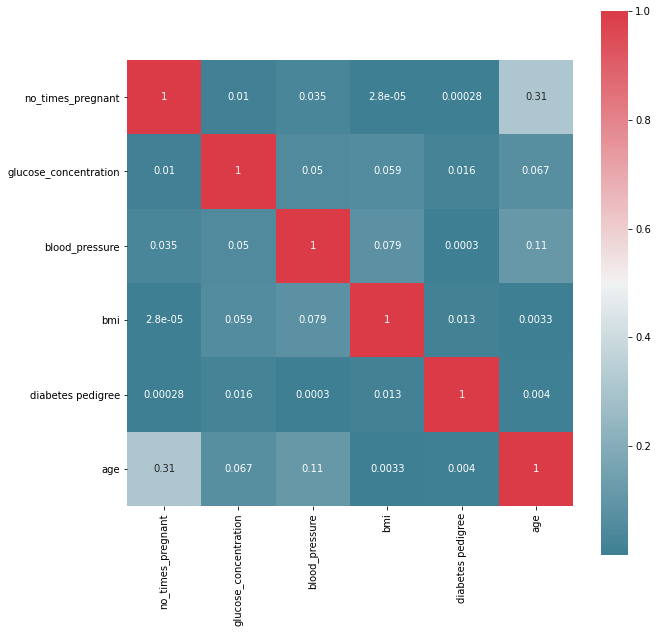

In [24]:
f, ax = plt.subplots(figsize=(10,10))

r2 = diabetes_data[features_selected].corr()**2

sb.heatmap(r2,
            mask=np.zeros_like(r2, dtype=np.bool), 
            cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True);

Subsequently, we wrote a function to **remove** features with a correlation value **greater than or equal to 0.5 with each other**.

In [25]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs((df.corr())**2)
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]

# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr()**2)
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n

# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

In [26]:
features_selected = get_uncorr_features(diabetes_data[features_selected], 0.5)
print(f"Final selected features : {features_selected}")

Final selected features : ['no_times_pregnant', 'glucose_concentration', 'blood_pressure', 'bmi', 'diabetes pedigree', 'age']


After running the features through our function, no variables were removed as they **do not have a correlation value of 0.5 or higher with each other**. 

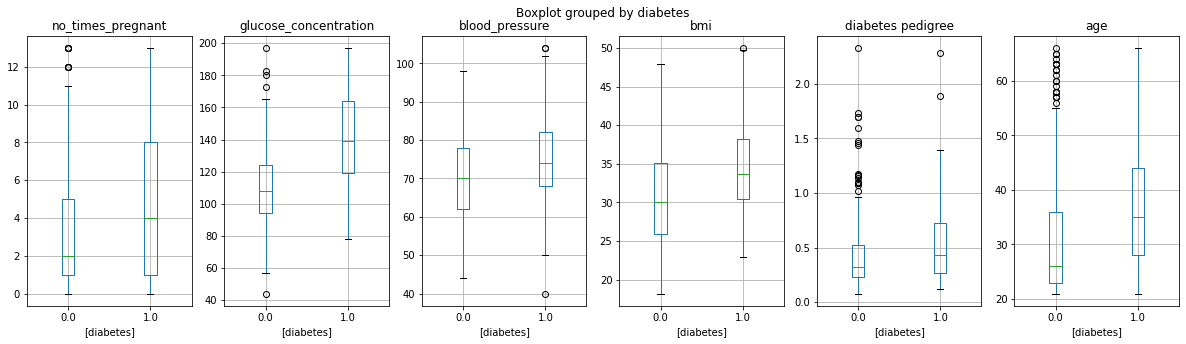

In [27]:
n = len(features_selected)

r, c = 1,6
fig, ax = plt.subplots(r, c, figsize=(20,5))

for i in range(n):
    feature = features_selected[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    diabetes_data[['diabetes',feature]].boxplot(by='diabetes', ax=ax)

plt.show()

### Model Training

After feature selection, we will proceed onto **fitting** our models. 

For an unbiased estimation of the predictive performance of machine learning models, we should distinguish between data that will be used for model fitting as well as data that will be used to test our model. Hence, we needed to split our current dataset into training and test sets.

We used the `model_selection` package from `scikit-learn` to split our dataset **randomly** into 75/25. We will  be **keeping 25% of the dataset for the purpose of our model evaluation**.

In [28]:
#train_test_split

from sklearn.model_selection import train_test_split

X = diabetes_data[features_selected]
y = diabetes_data["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
print(y_test.shape)

(147,)


Since our dependent variable, `diabetes`, is a categorical data, our data science project falls under the classification category.

Hence, we decided to use 3 models to fit our data, namely using `Logistic Regression`, `K-nearest-neighbors` and `Random Forest Classifier`. We will then select the best model (measured in terms of Accuracy and F-score) to be used subsequently.

### Model 1: Logistic Regression

Logistic Regression is a classification algorithm that provides a binary outcome with only **2 possible scenarios** — either **the event happens (1)** or **it does not happen (0)**. This is relevant for our investigation as our dependent variable, `diabetes`, is binary. 

Logistic Regression assumes no, or very little multicollinearity between the predictor variables (as verified earlier in our Multivariate Analysis). The result allows us to calculate the various coefficents of each attribute, where we hope to find the best predictor of diabetes (highest coefficient).

In [30]:
from sklearn.linear_model import LogisticRegression


LogRegClassifier = LogisticRegression().fit(X_train,y_train)

### Model 2: K-Nearest Neighbors

K-Nearest Neighbors is a pattern recognition algorithm to find the **K closest relatives** to classify datasets. Data is placed within the category of its nearest K neighbors. This algorithm is simple to implement and robust to noisy training data.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNNeighborClassifier = KNeighborsClassifier().fit(X_train,y_train)

### Model 3: Random Forest Classifier

The Random Forest Classifier consists of a large number of individual decision trees that operates independently. Each individual decision tree in the random forest produces a class prediction and the class with the most votes becomes our model’s prediction for the result.

In random forests, each tree in the ensemble is built from a sample drawn with replacement from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`. 

The purpose of these two sources of randomness is to decrease the variance of the forest estimator, which yields an overall better model. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

RanForestClassifer = RandomForestClassifier().fit(X_train,y_train)

### Model Evaluation

Finally, we will evaluate our models using the metrics of Accuracy and F1-score.

Accuracy is calculated by \frac{TP+TN}{TP+TN+FP+FN}

In [33]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix

### Model 1: Logistic Regression Evaluation

Model 1: Logistic Regression Evaluation
-----------------
Accuracy: 0.776
F1-score: 0.778


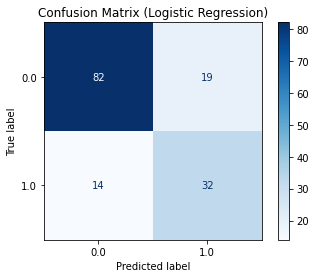

In [34]:
#predict based on test set
y_predict = LogRegClassifier.predict(X_test)

#compare with ground truth 
accuracy = accuracy_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')



print("Model 1: Logistic Regression Evaluation")
print("-----------------")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")

# Confusion Matrix
cm_lgrg = confusion_matrix(y_test, y_predict)
disp = plot_confusion_matrix(LogRegClassifier, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format='d',
                                 normalize=None)
disp.ax_.set_title('Confusion Matrix (Logistic Regression)')     
plt.show()                       

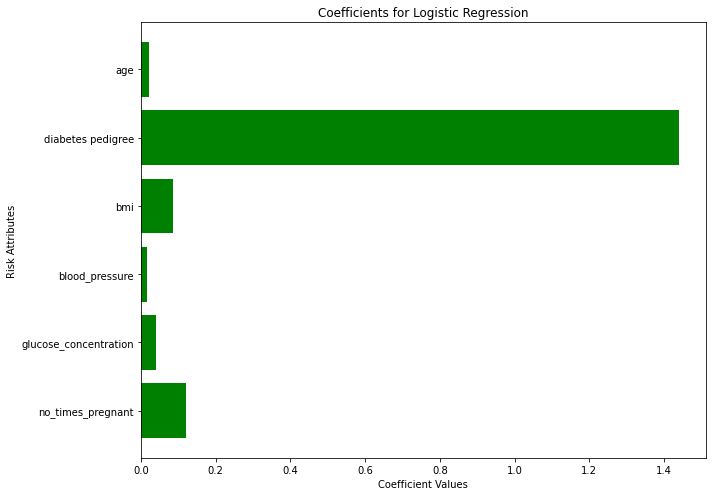

In [35]:
# print out the various coefficents to identify which have the most positive relation to Diabetes

plt.figure(figsize=(10, 7))
plt.barh(X_train.columns, LogRegClassifier.coef_[0], color ='g')
plt.xlabel("Coefficient Values")
plt.ylabel("Risk Attributes")
plt.title("Coefficients for Logistic Regression")
plt.tight_layout() 
plt.show()

**Results:**

The classifier had an **accuracy** of **77.6%** and an **F1-score** of **0.778**, out of 147 test cases.

Based on the **coefficient value** of each attribute from **Logistic Regression**, we can see that `diabetes pedigree` had the **highest positive correlation with diabetes**.

### Model 2: K-Nearest Neighbors Evaluation

Model 2: K-Nearest Neighbors Evaluation
-----------------
Accuracy: 0.741
F1-score: 0.744


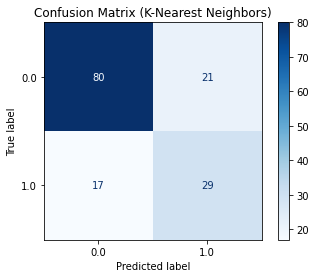

In [36]:
#predict based on test set
y_predict = KNNeighborClassifier.predict(X_test)

#compare with ground truth 
accuracy = accuracy_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print("Model 2: K-Nearest Neighbors Evaluation")
print("-----------------")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_predict)
disp = plot_confusion_matrix(KNNeighborClassifier, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format='d',
                                 normalize=None)
disp.ax_.set_title('Confusion Matrix (K-Nearest Neighbors)')     
plt.show()     

**Results:**

The classifier had an **accuracy** of **74.1%** and an **F1-score** of **0.744**, out of 147 test cases.

### Model 3: Random Forest Classifier Evaluation

Model 3: Random Forest Classifier Evaluation
-----------------
Accuracy: 0.776
F1-score: 0.778


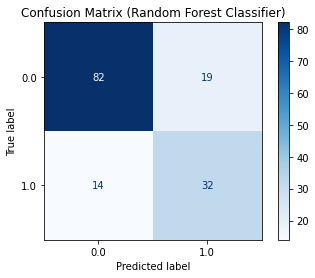

In [37]:
#predict based on test set
y_predict = RanForestClassifer.predict(X_test)

#compare with ground truth 
accuracy = accuracy_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print("Model 3: Random Forest Classifier Evaluation")
print("-----------------")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_predict)
disp = plot_confusion_matrix(RanForestClassifer, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format='d',
                                 normalize=None)
disp.ax_.set_title('Confusion Matrix (Random Forest Classifier)')     
plt.show()     

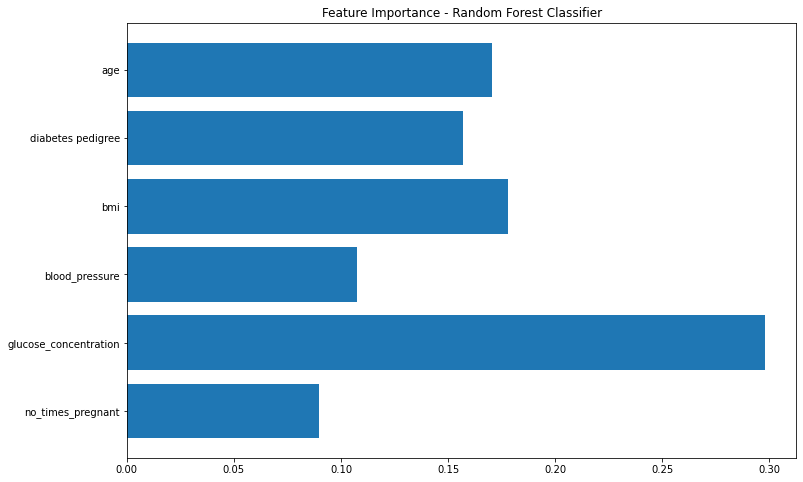

In [38]:
plt.figure(figsize=(12,8))

plt.barh(features_selected, RanForestClassifer.feature_importances_)
plt.title('Feature Importance - Random Forest Classifier')

plt.show()

**Results:**

The classifier had an **accuracy** of **78.2%** and an **F1-score** of **0.785**, out of 147 test cases.

`glucose_concentration` was also identified as the **most important feature** for the **Random Forest Classifier** based on the graph shown above.

### Conclusion 

#### Determining the most important factors which causes diabetes

Based on the evaluation of the Random Forest Classifier and Logistic Regression models, we can conclude that the 2 most important features which affected whether a person would have diabetes or not would be:

- `glucose_concentration` 
- `diabetes pedigree` 

#### Model Evaluation

Based on the accuracy and F1-score as shown above, we can conclude that the **RandomForestClassifier** is the best model for this diabetes classification problem.

We then proceeded to predict the classification of the test data.

In [39]:
test_data = pd.read_csv("test.csv")
test_data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [40]:
test_id = test_data['p_id']
test_data = test_data[features_selected]

predicted = RanForestClassifer.predict(test_data)

In [41]:
submission = pd.DataFrame({'p_id':test_id, 'diabetes':predicted})

submission.to_csv('submission.csv', index=False)

### Future Room for Consideration
1. We could have conducted **feature bucketing**, where we segment variables such as `blood_pressure` into `high_blood_pressure` and `low_blood_pressure`
2. We could consider conducting **hyper-parameter tuning** to select a parameter that would give the best performance for an algorithm using GridSearchCV
3. The dataset found could have **included more factors**, as there could be many other reasons that affect whether a person suffers from diabetes (e.g. gender, intake of sugary food per day, level of exercise, etc.)

**References:**

https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees <br>
https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56 <br>
